In [1]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Simulation import buffer_simulation, save_obj, load_obj
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py



In [70]:
datos  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics.xlsx',sheet_name='graficar')
tabla= datos.set_index("Voltajes")
tabla
df_tabla = pd.DataFrame(tabla)
df_tabla

,E,FlipPatch,% Fallos,Unnamed: 4,Unnamed: 5,Fallos
Voltajes,,,,,,
0.53,0.331850,0.636760,6.905365,NaN,1048576.0,72408
0.54,0.585180,0.982999,1.126957,NaN,NaN,11817
0.55,0.645479,1.000000,0.304317,NaN,NaN,3191
0.56,0.712090,1.000000,0.107384,NaN,NaN,1126
0.57,0.844462,1.000000,0.032139,NaN,NaN,337
0.58,0.999558,1.000000,0.005341,NaN,NaN,56
0.59,0.999558,1.000000,0.000572,NaN,NaN,6
0.60,0.999558,1.000000,0.000191,NaN,NaN,2


<Figure size 2000x500 with 0 Axes>

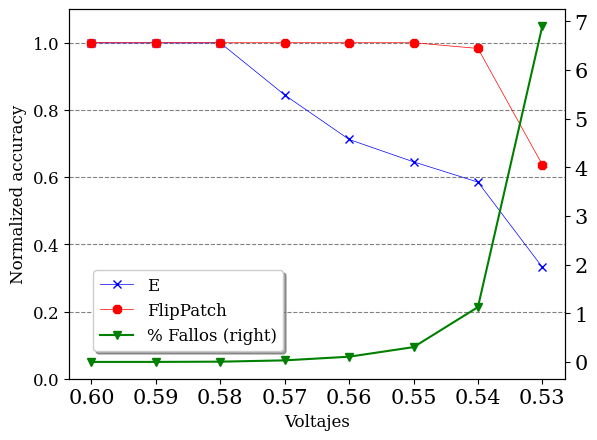

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [69]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator

#from datetime import datetime
import time
mpl.rcParams['font.family']='serif'



l='0.5'
marksize=6

x=datos["Voltajes"]


y= [0, 0.2,0.4,0.6,0.8,1]

fig = plt.figure(figsize=(20,5), dpi=100)

plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots()

#ax2 = ax1.twinx()





#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))

plt.xlabel("$V_{dd}$ (V)", fontsize=12,  fontfamily="serif")
#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")
#ax2.set_ylabel('Fault rate (%)', fontsize=12,  fontfamily="serif")
#ax2.yaxis.tick_right()


ax1.set_xticks([0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60],labelsize=12,fontfamily="serif") 
#ax2.set_xticks([6.9,1.12,0.30,0.10,0.03,0.005,0.0005,0.0001]) 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )
plt.yticks( fontsize= 12, fontfamily="serif" )
 
ax2.set_ylim(0,  7)
ax1.set_ylim(0,1.1)

#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()


df_tabla["E"].plot( color='b', ls='-', lw=l, marker='x', markersize=marksize)
df_tabla["FlipPatch"].plot( color='r', ls='-', lw=l, marker='8', markersize=marksize)          
df_tabla["% Fallos"].plot(secondary_y=True,style="g", ls='-',marker='v', markersize=marksize)

#ax2.plot(tabla["% Fallos"] ,label='% of Faults', color='g', ls='-',marker='v', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')

ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')





fig1.legend(fontsize=12,bbox_to_anchor=(0.15,0.15),loc ="lower left", shadow = True)
#ax2.legend(fontsize=12, bbox_to_anchor=(0.0,0.15),loc ="lower left", prop={'size':14},shadow = False)



#plt.text(1, 1, 'alexnet', fontsize=13.5, fontfamily="serif")
#ax1.text(-2.90, -0.24, '0,0005', fontsize=13.5, fontfamily="serif")
#ax1.text(5.8, -0.24, '0,005', fontsize=13.5, fontfamily="serif")
#plt.text(8.6,-0.24, '0,032', fontsize=13.5, fontfamily="serif")
#plt.text(12.2, -0.24, '0,30', fontsize=13.5, fontfamily="serif")
#plt.text(15.45, -0.24, '1,12', fontsize=13.5, fontfamily="serif")
#plt.text(18.2, -0.24, '6,9', fontsize=13.5, fontfamily="serif")
#
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
#prop={'size':15}



#plt.savefig('Acc_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show

<Figure size 2000x500 with 0 Axes>

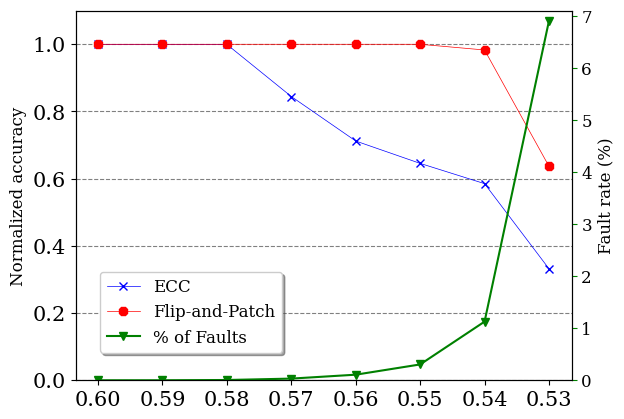

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [80]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator

#from datetime import datetime
import time
mpl.rcParams['font.family']='serif'



l='0.5'
marksize=6

x=datos["Voltajes"]
y1 = 0.05 * x**2
y2 = 1 *y1

fig = plt.figure(figsize=(20,5), dpi=100)
plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()




#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))

plt.xlabel("$V_{dd}$ (V)", fontsize=12,  fontfamily="serif")
#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")
ax2.set_ylabel('Fault rate (%)', fontsize=12,  fontfamily="serif")
#ax2.yaxis.tick_right()


ax1.set_xticks([0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60],labelsize=12,fontfamily="serif") 
#ax2.set_xticks([6.9,1.12,0.30,0.10,0.03,0.005,0.0005,0.0001]) 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )
plt.yticks( fontsize= 12, fontfamily="serif" )
ax2.set_ylim(0,  7.1)
ax1.set_ylim(0,1.1)
#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()


ax1.plot(tabla["E"], label='ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["FlipPatch"], label='Flip-and-Patch', color='r', ls='-', lw=l, marker='8', markersize=marksize)
ax2.plot(tabla["% Fallos"] ,label='% of Faults', color='g', ls='-',marker='v', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')

ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')



ax2.tick_params(axis='y', color='g')



fig1.legend(fontsize=12,bbox_to_anchor=(0.15,0.15),loc ="lower left", shadow = True)




#plt.text(1, 1, 'alexnet', fontsize=13.5, fontfamily="serif")
#ax1.text(-2.90, -0.24, '0,0005', fontsize=13.5, fontfamily="serif")
#ax1.text(5.8, -0.24, '0,005', fontsize=13.5, fontfamily="serif")
#plt.text(8.6,-0.24, '0,032', fontsize=13.5, fontfamily="serif")
#plt.text(12.2, -0.24, '0,30', fontsize=13.5, fontfamily="serif")
#plt.text(15.45, -0.24, '1,12', fontsize=13.5, fontfamily="serif")
#plt.text(18.2, -0.24, '6,9', fontsize=13.5, fontfamily="serif")
#
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
#prop={'size':15}



plt.savefig('Acc_by_fault_rate.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show